### Data Exploration

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier

In [4]:
# Load the dataset to inspect its structure
Consumer_Complaints_data = pd.read_csv('C:\\Users\\MARY\\Desktop\\Capstone_Project\\consumer_complaints_analysis\\data_comp.zip', encoding='ISO-8859-1')
# Display the first few rows of the dataset
Consumer_Complaints_data.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [5]:
# Get a summary of the dataset, including data types and non-null counts
Consumer_Complaints_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  162421 non-null  int64 
 1   product     162421 non-null  object
 2   narrative   162411 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


## **From info printout we have;**

Number of Rows: 162,421

Number of Columns: 3

Unnamed: 0: Integer column, likely an unnecessary index.

product: Object type, containing categories of financial products.

consumer_complaint_narrative: Object type, containing the complaint text.


**We drop the Unnecessary Index Column: Since Unnamed: 0 is just an index, we can drop it**

In [6]:
#Dropping the Unnecessary Index Column

Consumer_Complaints_data.drop('Unnamed: 0', axis=1, inplace=True)

Consumer_Complaints_data.head()

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


 **Check for Missing Values**

In [9]:
# Checking for missing values

Consumer_Complaints_data.isnull().sum()


product       0
narrative    10
dtype: int64

The printout indicates that there are 10 missing values in the narrative column and 0 missing values in the product column.

**Drop Missing Values**

In [10]:
# Drop missing values

Consumer_Complaints_data.dropna(inplace=True)

Consumer_Complaints_data.isnull().sum()

product      0
narrative    0
dtype: int64

**Value Counts: Check the distribution of categories in the product column**

In [11]:
# Check the distribution of categories in the product column

Consumer_Complaints_data['product'].value_counts()

#**Plotting the distribution of categories in the product column**

credit_reporting       91172
debt_collection        23148
mortgages_and_loans    18990
credit_card            15566
retail_banking         13535
Name: product, dtype: int64

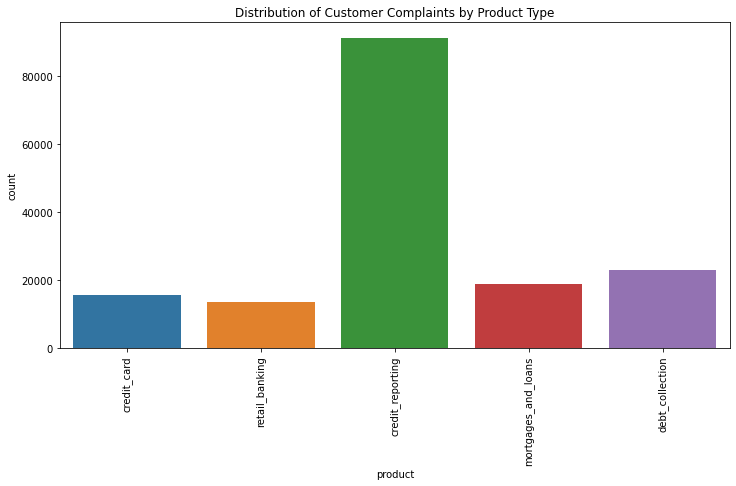

In [13]:
#Bar Plotting the distribution of categories in the product column

plt.figure(figsize=(12,6))
sns.countplot(x='product', data=Consumer_Complaints_data)
plt.xticks(rotation=90)
plt.title('Distribution of Customer Complaints by Product Type')  
plt.show()

**Distribution of Narrative Length**

Text(0.5, 1.0, 'Distribution of Narrative Length')

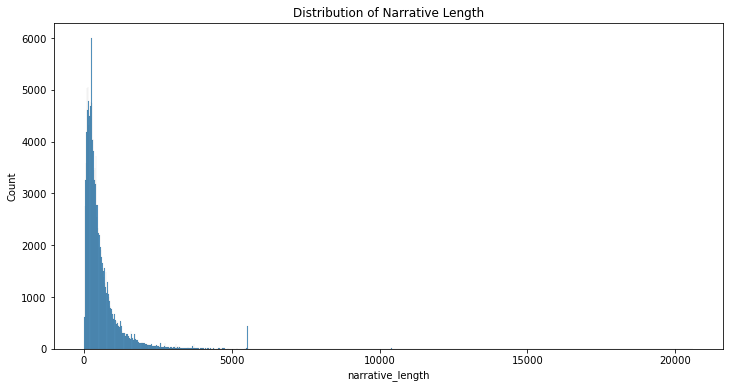

In [15]:
# Distribution of Narrative Length

Consumer_Complaints_data['narrative_length'] = Consumer_Complaints_data['narrative'].apply(lambda x: len(x))

plt.figure(figsize=(12,6))
sns.histplot(x='narrative_length', data=Consumer_Complaints_data)
plt.title('Distribution of Narrative Length')